# Importing libraries and datasets

In [25]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [26]:
import imageio,io
import pydotplus

In [27]:
with open('/content/drive/MyDrive/Heart Disease Prediction/Datasets/df_combined.pickle', 'rb') as f:
    df = pickle.load(f)

# Splitting into training and testing sets

In [28]:
X, y = df.drop(columns=['num']).values, df['num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Decision Tree classifier and making predictions

In [51]:
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
def show_tree(tree,features,path):
  f = io.StringIO()
  export_graphviz(tree,out_file=f,feature_names=features)
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  img = imageio.imread(path)
  plt.rcParams['figure.figsize'] = (100,40)
  plt.imshow(img)

In [52]:
features = ["age",	"sex",	"cp",	"trestbps",	"chol",	"fbs",	"restecg",	"thalach",	"exang",	"oldpeak",	"slope",	"thal",	"num"]
show_tree(classifier,features,'decision_tree')

Output hidden; open in https://colab.research.google.com to view.

In [53]:
y_pred_train = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

# Results for training dataset

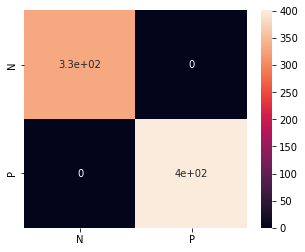

In [54]:
cm = confusion_matrix(y_train, y_pred_train)
df_cm = pd.DataFrame(cm, index=['N','P'], columns = ['N','P'])
plt.figure(figsize=(5,4))
plt.clf()
res = sns.heatmap(df_cm, annot=True)

In [55]:
accuracy_score(y_train, y_pred_train)

1.0

In [56]:
recall_score(y_train, y_pred_train)

1.0

In [57]:
tn, fp, fn, tp = cm.ravel()
tnr_train = 1 - fp / (tn + fp)
print(tnr_train)

1.0


In [58]:
precision_score(y_train, y_pred_train)

1.0

In [59]:
f1_score(y_train, y_pred_train)

1.0

# Results for testing dataset

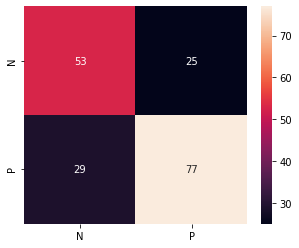

In [60]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['N','P'], columns = ['N','P'])
plt.figure(figsize=(5,4))
plt.clf()
res = sns.heatmap(df_cm, annot=True)

In [61]:
accuracy_score(y_test, y_pred)

0.7065217391304348

In [62]:
recall_score(y_test, y_pred)

0.7264150943396226

In [63]:
tn, fp, fn, tp = cm.ravel()
tnr_test = 1 - fp / (tn + fp)
print(tnr_test)

0.6794871794871795


In [64]:
precision_score(y_test, y_pred)

0.7549019607843137

In [65]:
f1_score(y_test, y_pred)

0.7403846153846154

# Results Summary

In [66]:
results = {
     'Model': 'Decision Tree',
     'Training Dataset Accuracy': accuracy_score(y_train, y_pred_train),
     'Testing Dataset Accuracy': accuracy_score(y_test, y_pred),
     'Training Dataset Sensitivity' : recall_score(y_train, y_pred_train),
     'Testing Dataset Sensitivity' : recall_score(y_test, y_pred),
     'Training Dataset Precision' : precision_score(y_train, y_pred_train),
     'Testing Dataset Precision' : precision_score(y_test, y_pred),
     'Training Dataset Specificity' : tnr_train,
     'Testing Dataset Specificity' : tnr_test,
     'Training Dataset F-Score' : f1_score(y_train, y_pred_train),
     'Testing Dataset F-Score' : f1_score(y_test, y_pred),
}

pd.DataFrame(results, index=[0])

,Model,Training Dataset Accuracy,Testing Dataset Accuracy,Training Dataset Sensitivity,Testing Dataset Sensitivity,Training Dataset Precision,Testing Dataset Precision,Training Dataset Specificity,Testing Dataset Specificity,Training Dataset F-Score,Testing Dataset F-Score
0,Decision Tree,1.0,0.706522,1.0,0.726415,1.0,0.754902,1.0,0.679487,1.0,0.740385
